## Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 


## Load Data and display some information of dataset

In [4]:
df = pd.read_csv('family.csv')

df.head()

len(df)

32561

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30725 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 1. Data Cleaning

### Check missing values and graph

In [7]:
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1836
relationship         0
race                 0
gender               0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64


<Axes: >

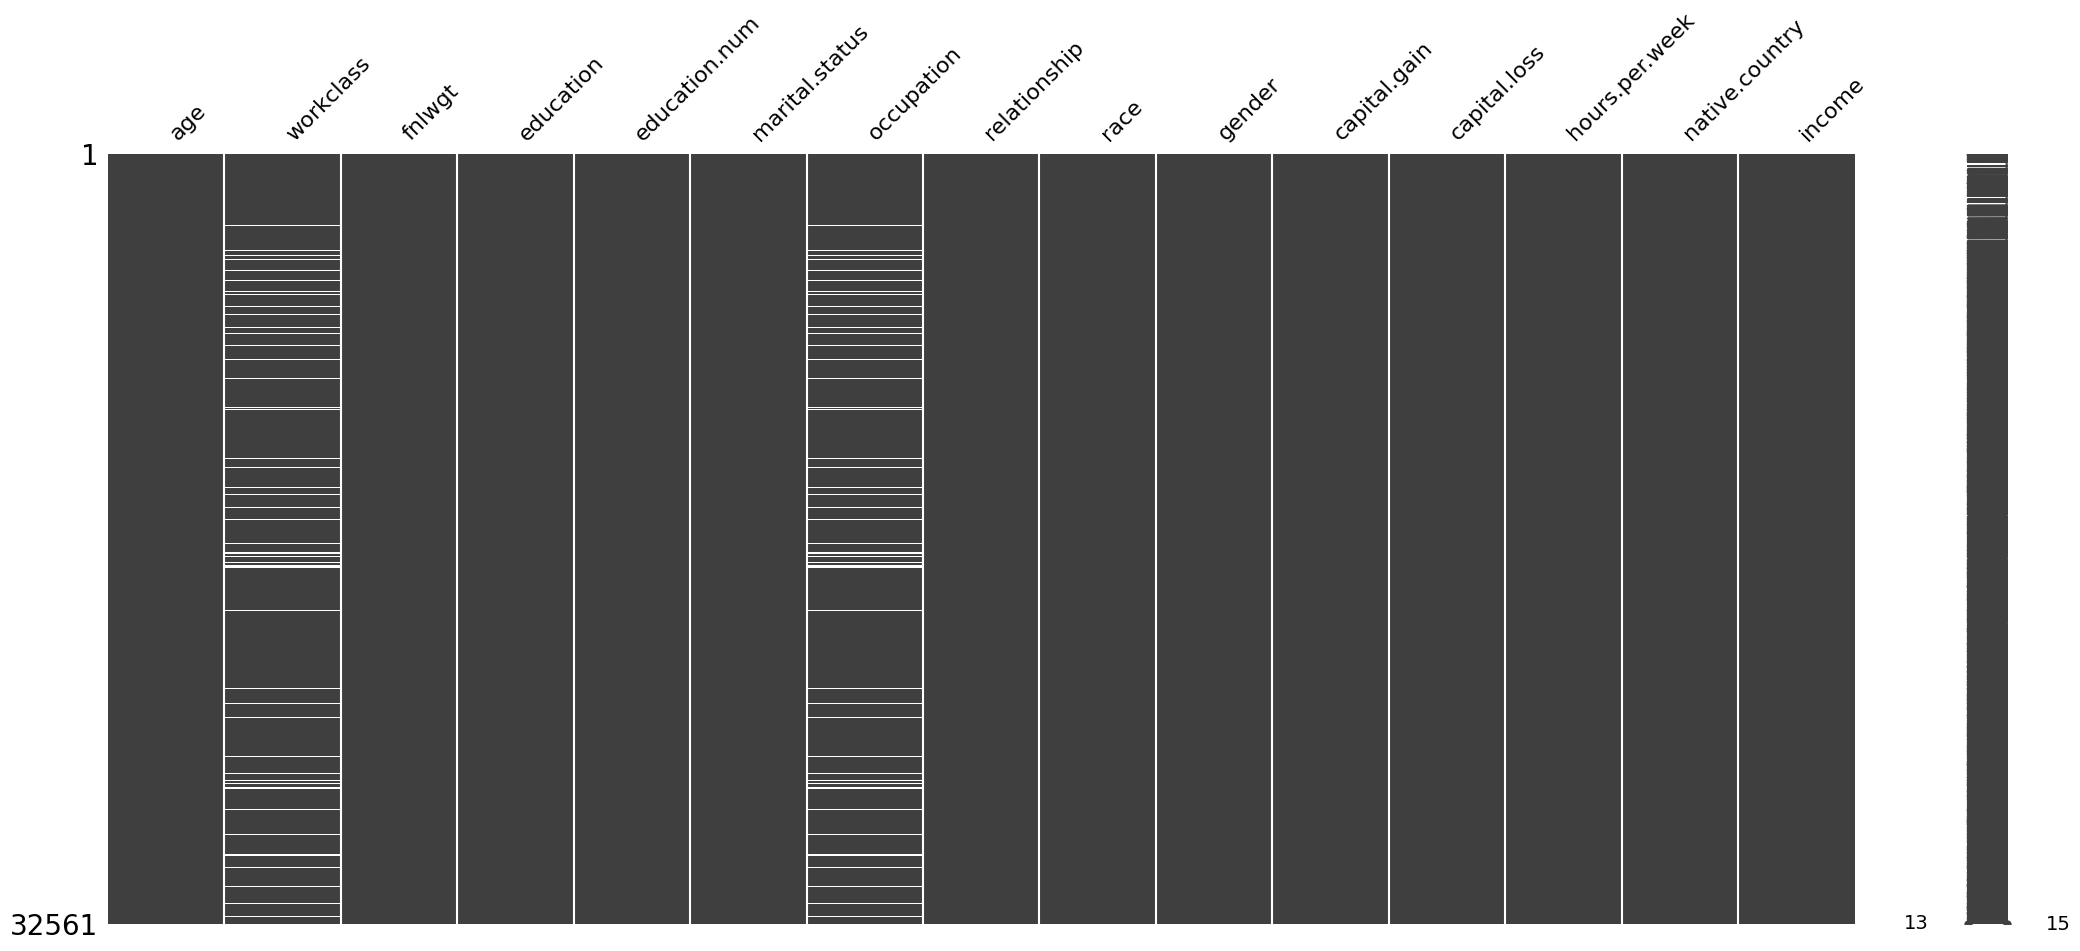

In [11]:
# Visualize missing values as a matrix
msno.matrix(df)

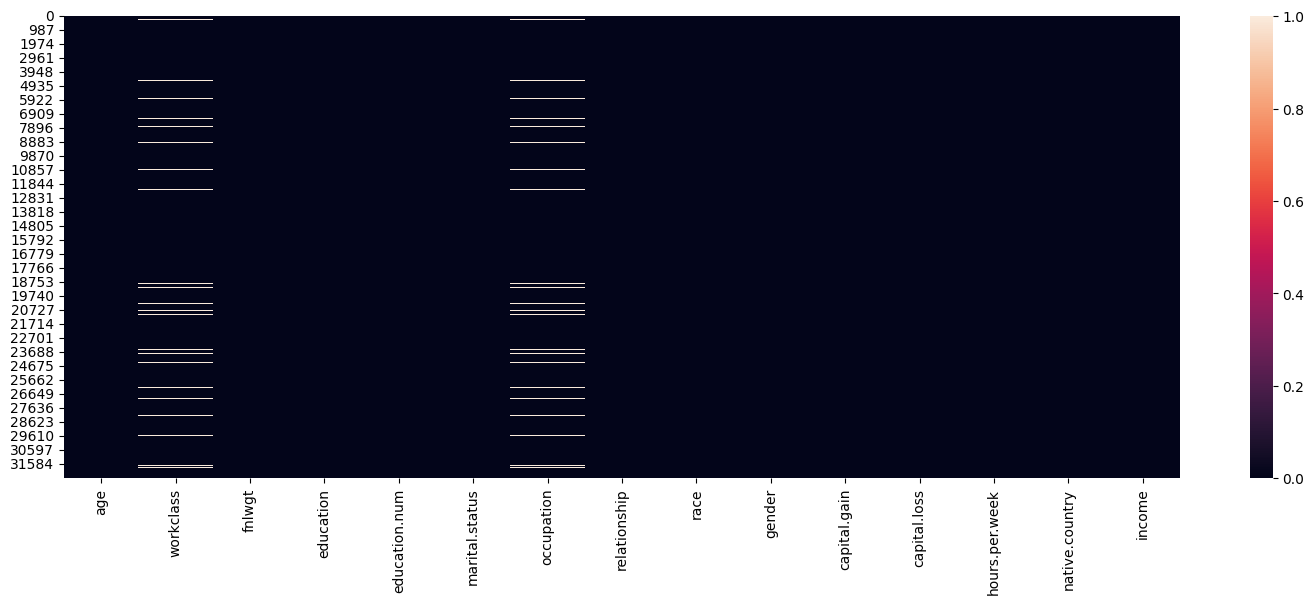

In [8]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull())
plt.show()

### Fill missing values

In [21]:
df['workclass'].fillna('Unknown', inplace=True)

#df['workclass'] = df['workclass'].fillna('Unknown')

#df['workclass'] 
print(df.isnull().sum())

print(df.head())

age                  0
workclass            0
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1836
relationship         0
race                 0
gender               0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64
   age workclass  fnlwgt     education  education.num marital.status  \
0   90   Unknown   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Unknown  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race  gender  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2    

C:\Users\dell\AppData\Local\Temp\ipykernel_8080\56617494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna('Unknown', inplace=True)


### Drop missing values 

In [30]:
#df["occupation"].dropna(inplace=True)

df.dropna(subset='occupation' , inplace=True)

print(df.isnull().sum())

#df.head()

len(df)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
gender            0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


30725

## 2. Categorical Feature
Categorical features refer to variables in a dataset that can take on a limited, fixed number of possible values or categories. 
These variables typically represent characteristics such as a person's gender (male/female)

### 2.1 Identify categorical columns

In [48]:
#df['gender'].astype('category')

df['gender'] = df['gender'].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30725 non-null  int64   
 1   workclass       30725 non-null  object  
 2   fnlwgt          30725 non-null  int64   
 3   education       30725 non-null  object  
 4   education.num   30725 non-null  int64   
 5   marital.status  30725 non-null  object  
 6   occupation      30725 non-null  object  
 7   relationship    30725 non-null  object  
 8   race            30725 non-null  object  
 9   gender          30725 non-null  category
 10  capital.gain    30725 non-null  int64   
 11  capital.loss    30725 non-null  int64   
 12  hours.per.week  30725 non-null  int64   
 13  native.country  30725 non-null  object  
 14  income          30725 non-null  object  
dtypes: category(1), int64(6), object(8)
memory usage: 3.5+ MB


In [47]:
categorical_columns = df.select_dtypes('category').columns
categorical_columns

Index(['gender'], dtype='object')

### 2.2 Encode categorical variables - One-hot encoding

In [51]:
df_encoded = pd.get_dummies(df, columns=['gender'], dtype=int)
df_encoded

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,native.country,income,gender_Female,gender_Male
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,4356,18,United-States,<=50K,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,3900,40,United-States,<=50K,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,3900,40,United-States,<=50K,1,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,3770,45,United-States,<=50K,1,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,0,3770,40,United-States,<=50K,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,0,0,40,United-States,<=50K,0,1
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,<=50K,1,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K,0,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K,1,0


## 3. Handling Outliers

### 3.1 Identify numerical columns

## IQR (Inter Quartile Range) 

IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

IQR = Quartile3 – Quartile1

Syntax: numpy.percentile(arr, n, axis=None, out=None) 
Parameters : 
- arr :input array.
- n : percentile value.

The Interquartile Range (IQR) is a measure of statistical dispersion, or spread, that describes the range between the 25th and 75th percentiles of a dataset. It is particularly useful for identifying and handling outliers in data analysis.

The interquartile range calculated as difference between 1st quartile and 3rd quartile. Upper and Lower bounds: The lower and upper bounds are smallest and largest values of data range.

the multiplier of 1.5 is a commonly used threshold = 1.5 is threashold